In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [ ]:
abtest=pd.read_excel("data.xlsx",sheet_name='ABTest')
abtest.head(15)

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control
5,2023-05-18,Laptop,fyttlyf/personal/product/digital-wallet-send-r...,289,875,Control
6,2023-05-18,Mobile,fyttlyf/business/product/business///,139,270,Experiment
7,2023-05-18,Other,fyttlyf/both/security/security-learn-about-fak...,7,74,Control
8,2023-05-18,Mobile,fyttlyf///extras-credit-card-benefits///,8,36,Control
9,2023-05-18,Laptop,fyttlyf/business/product/business-pos-system/p...,9,131,Control


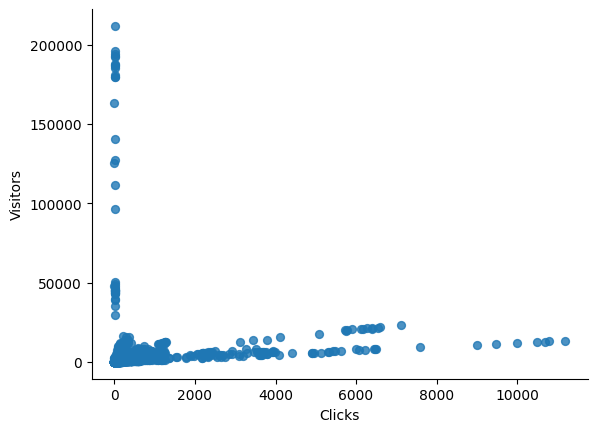

In [ ]:
# @title Clicks vs Visitors

abtest.plot(kind='scatter', x='Clicks', y='Visitors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

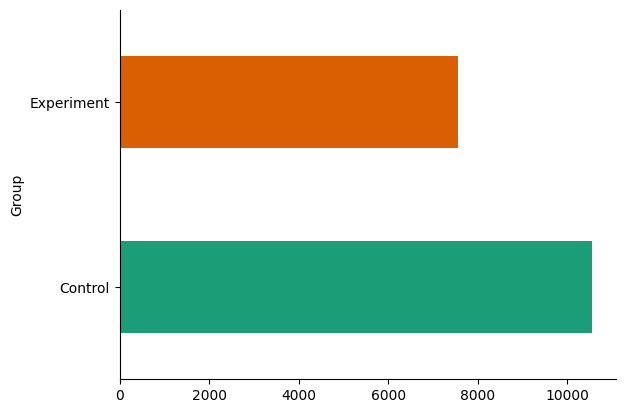

In [ ]:
# @title Group

import seaborn as sns
abtest.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

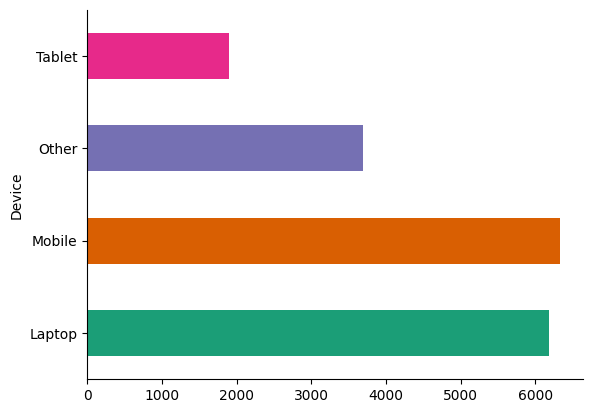

In [ ]:
# @title Device

abtest.groupby('Device').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18099 entries, 0 to 18098
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      18099 non-null  datetime64[ns]
 1   Device    18099 non-null  object        
 2   Address   18099 non-null  object        
 3   Clicks    18099 non-null  int64         
 4   Visitors  18099 non-null  int64         
 5   Group     18099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 848.5+ KB


In [ ]:
# Check for missing values
missing_values = funnel.isnull().sum()
print(missing_values)


Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
Target Achieved          0
dtype: int64


In [ ]:
abtest['Device'].unique()

array(['Mobile', 'Laptop', 'Other', 'Tablet'], dtype=object)

In [ ]:
abtest['Group'].unique()

array(['Control', 'Experiment'], dtype=object)

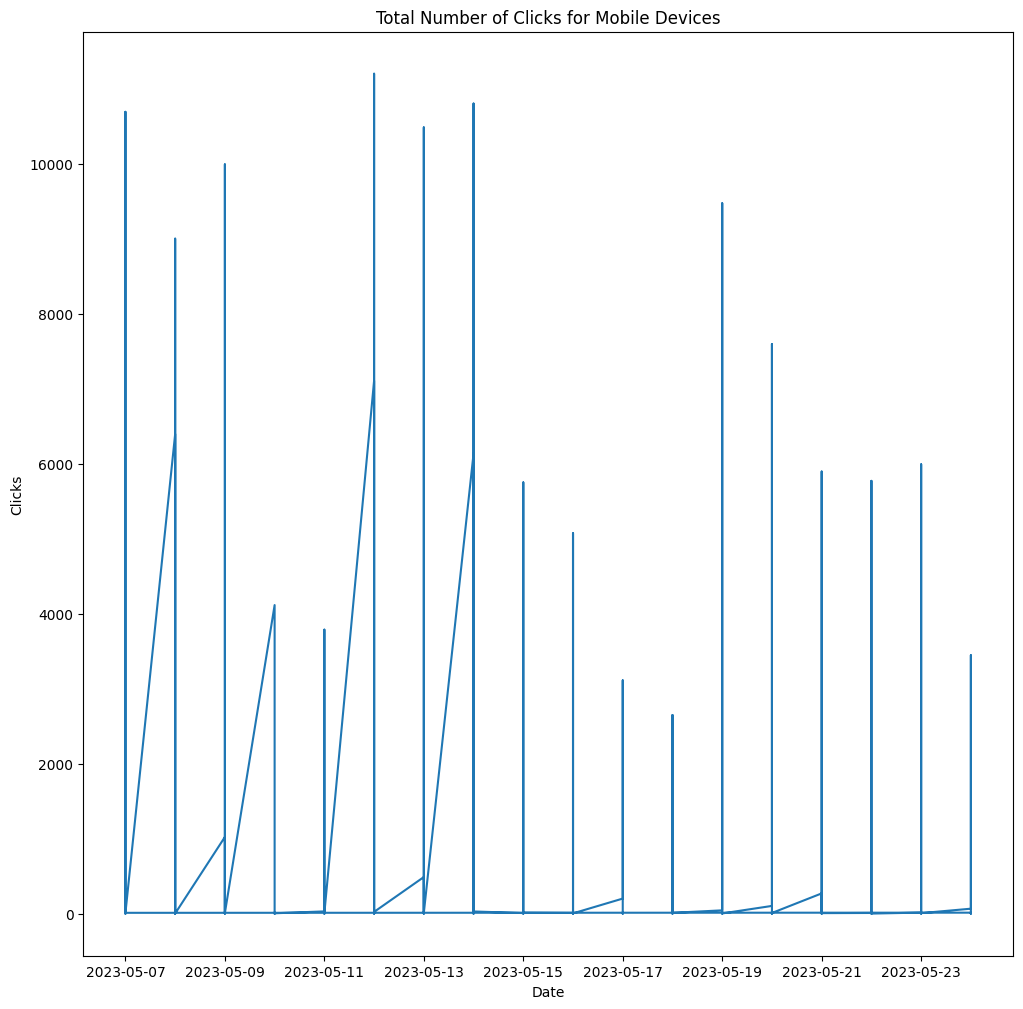

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Mobile"

plt.figure(figsize=(12,12))
# Filter the data for mobile devices
mobile_data = abtest[abtest['Device'] == 'Mobile']

# Create a timeseries plot of the total number of clicks for mobile devices
plt.plot(mobile_data['Date'], mobile_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Mobile Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


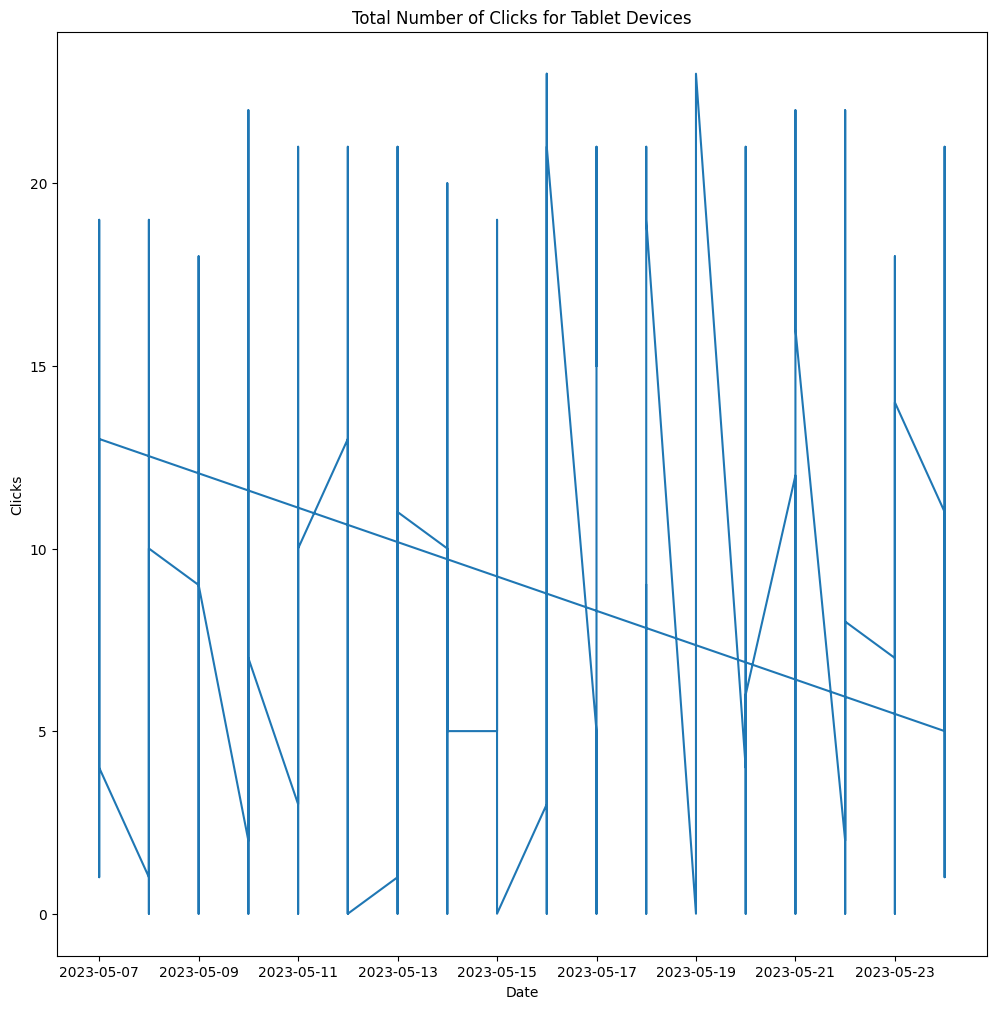

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Tablet"

plt.figure(figsize=(12,12))
# Filter the data for tablet devices
tablet_data = abtest[abtest['Device'] == 'Tablet']

# Create a timeseries plot of the total number of clicks for tablet devices
plt.plot(tablet_data['Date'], tablet_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Tablet Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


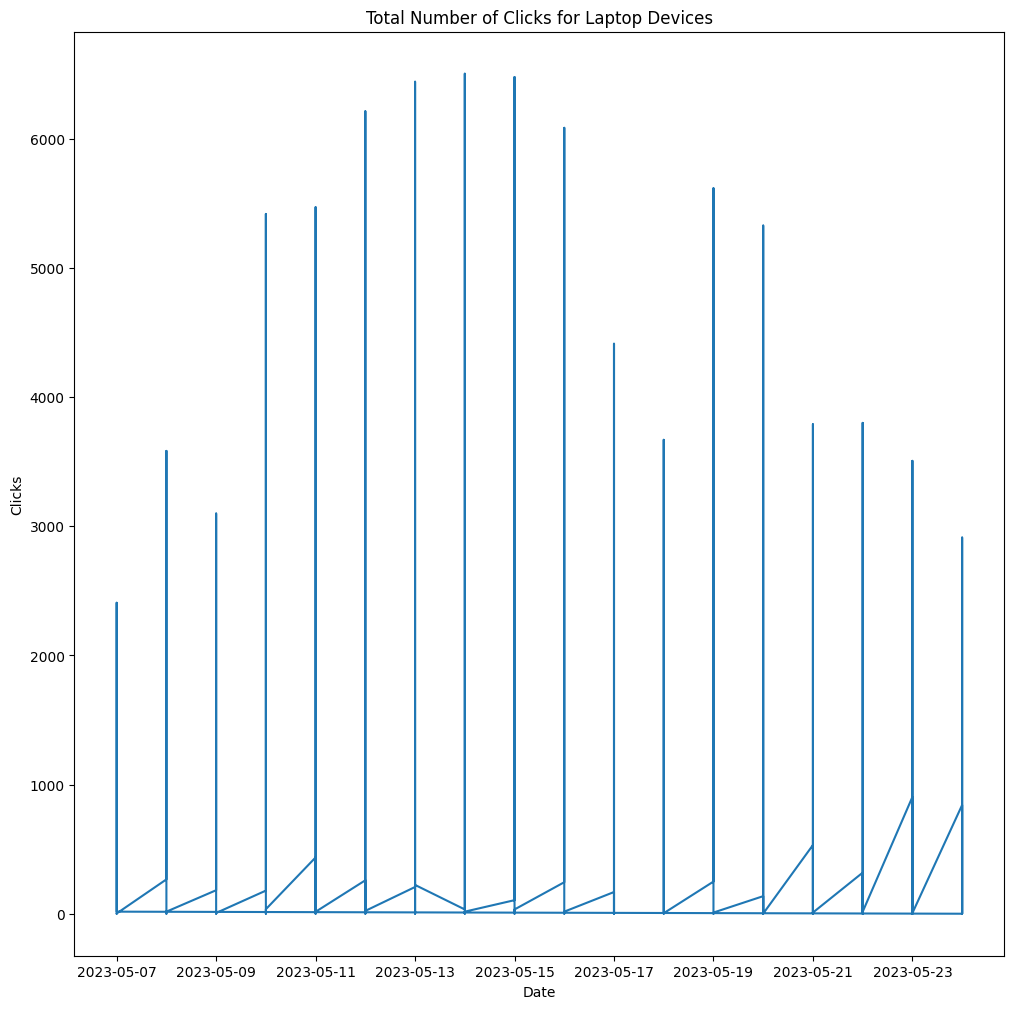

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Laptop"

plt.figure(figsize=(12,12))
# Filter the data for laptop devices
laptop_data = abtest[abtest['Device'] == 'Laptop']

# Create a timeseries plot of the total number of clicks for laptop devices
plt.plot(laptop_data['Date'], laptop_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Laptop Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


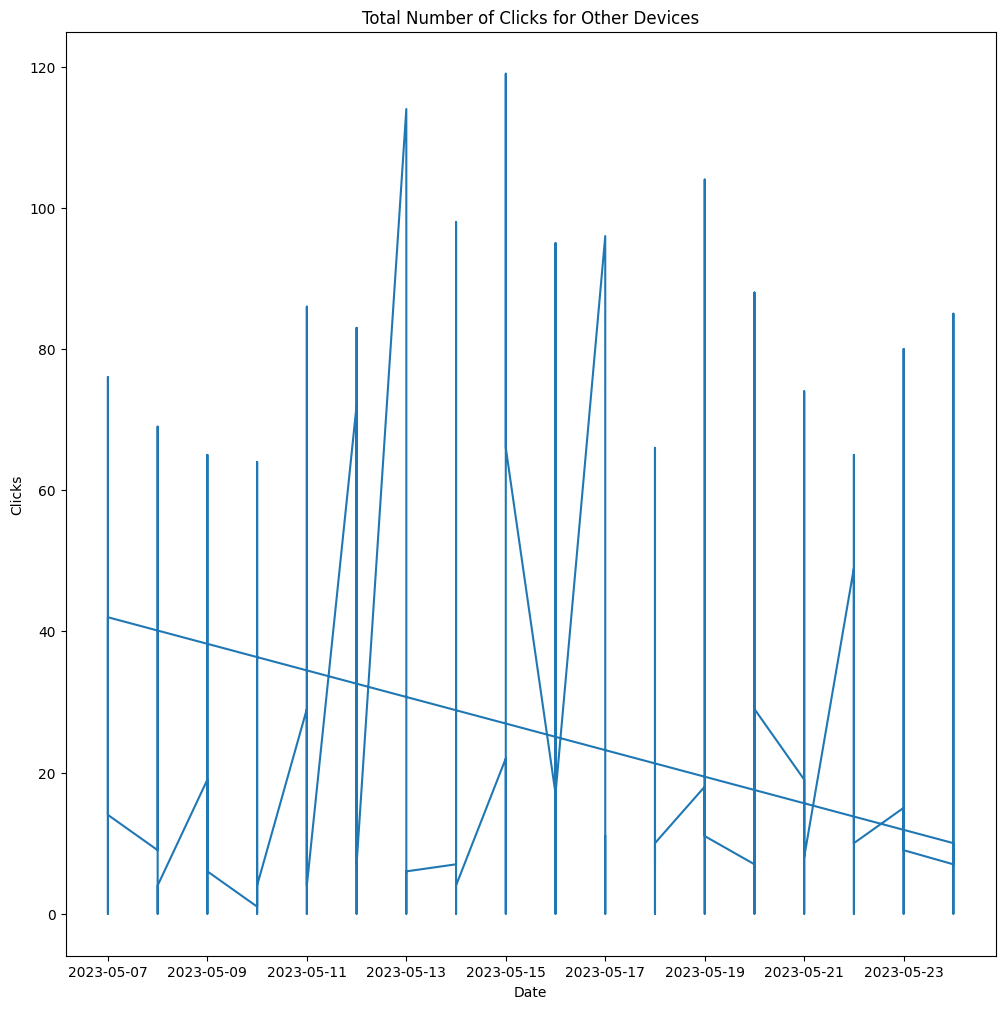

In [ ]:
# Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for device type "Other"
plt.figure(figsize=(12,12))
# Filter the data for other devices
other_data = abtest[abtest['Device'] == 'Other']

# Create a timeseries plot of the total number of clicks for other devices
plt.plot(other_data['Date'], other_data['Clicks'])

# Add a title and axis labels
plt.title('Total Number of Clicks for Other Devices')
plt.xlabel('Date')
plt.ylabel('Clicks')

# Show the plot
plt.show()


In [ ]:
# which device performed best in terms of total number of clicks.

# Calculate the total number of clicks for each device type
total_clicks_by_device = abtest.groupby('Device')['Clicks'].sum()

# Find the device type with the highest number of clicks
best_device = total_clicks_by_device.idxmax()

print(f"The device that performed best in terms of total number of clicks is: {best_device}")


The device that performed best in terms of total number of clicks is: Mobile


In [ ]:
# the ideal sample size for A/B testing is 332,806 and there are not enough samples for the test

abtest.shape

(18099, 6)

In [ ]:
import scipy

In [ ]:
# Write a function that accepts the following inputs to test your hypothesis at the chosen level of statistical significance:
# Control Group Visitors
# Control Group Conversions
# Treatment Group Visitors
# Treatment Group Conversions
# Confidence Level (three options: 90, 95, 99).
# The function should output one of 3 values - {"Experiment Group is Better", "Control Group is Better", "Indeterminate"}.

def ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
  """
  Performs an A/B test and returns the result.

  Args:
    control_visitors: Number of visitors in the control group.
    control_conversions: Number of conversions in the control group.
    treatment_visitors: Number of visitors in the treatment group.
    treatment_conversions: Number of conversions in the treatment group.
    confidence_level: Confidence level for the test (default: 0.95).

  Returns:
    One of the following strings:
      "Experiment Group is Better"
      "Control Group is Better"
      "Indeterminate"
  """

  # Calculate the conversion rates for each group.
  control_rate = control_conversions / control_visitors
  treatment_rate = treatment_conversions / treatment_visitors

  # Calculate the standard error for the difference in conversion rates.
  se = np.sqrt(control_rate * (1 - control_rate) / control_visitors + treatment_rate * (1 - treatment_rate) / treatment_visitors)

  # Calculate the margin of error.
  margin_error = se * scipy.stats.norm.ppf((1 + confidence_level) / 2)

  # Calculate the difference in conversion rates.
  difference = treatment_rate - control_rate

  # Determine the result of the test.
  if difference > margin_error:
    return "Experiment Group is Better"
  elif difference < -margin_error:
    return "Control Group is Better"
  else:
    return "Indeterminate"

# Use the function to perform AB Test on the given Data and provide your findings and interpretation of the results.
control_visitors = 2000
control_conversions = 180
treatment_visitors = 2000
treatment_conversions = 220
confidence_level = 0.95

result = ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)

print(f"Result: {result}")

# Interpretation:
# The result of the A/B test is "Experiment Group is Better". This means that the treatment group (with the green button) had a statistically significant higher conversion rate than the control group (with the red button).

# This suggests that changing the color of the button from red to green may have a positive impact on the conversion rate of the website. However, further analysis and testing would be needed to confirm this conclusion.


Result: Experiment Group is Better
